Calculating with all features

1. SGDClassifier() + RandomizedSearchCV          

In [177]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
# from scipy.sparse import csr_matrix, hstack

# import warnings
# warnings.filterwarnings('ignore')


# # Load the data
# df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
# Xcombined = pd.concat([df.iloc[:300, 3:19], df.iloc[:300, 20:-1]], axis=1)
# yhome_win = df.iloc[:300, -1:]

# SEED = 1

# # Making sparse matrix (for easier/quicklier calculating) X_train_sparse 
# Xcombined_sparse = csr_matrix((np.ones(Xcombined.values.size, dtype=int),
#                                Xcombined.values.reshape(-1),
#                                np.arange(Xcombined.values.shape[0] + 1) * Xcombined.values.shape[1]))[:, 1:]


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# sgd_logit = SGDClassifier(loss='log_loss', random_state=17, n_jobs=-1)
# sgd_logit.fit(X_train, y_train)

# # Define the hyperparameter grid for random search
# param_dist = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': np.logspace(-5, 1, 7),
#     'max_iter': np.arange(100, 1000, 100),
#     'random_state': [SEED]
# }

# # Create the SGDClassifier model
# sgd_clf = SGDClassifier(loss='log_loss', random_state=17, n_jobs=-1)

# # Perform random search with cross-validation
# random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
# random_search.fit(X_train, y_train)

# # Get the best model and its hyperparameters
# best_model = random_search.best_estimator_
# best_params = random_search.best_params_
# best_score = random_search.best_score_
# best_estimator = random_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)

# # Print the results
# print("Best Hyperparameters:")
# print(best_params)
# print(best_model)
# print(best_score)
# print(best_estimator)

# print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # strategy without searching huperparameters, only cross validation
# skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
# sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=skf, n_jobs=-1)
# sgd_clf.fit(X_train, y_train)
# print("Mean sgd_score", np.mean(sgd_score))
# print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, sgd_clf.predict(X_test)))


# sgd_clf_valid_pred_proba = sgd_clf.predict_proba(X_test)
# print("sgd_clf_valid_pred_proba", sgd_clf_valid_pred_proba)
# print(round(roc_auc_score(y_test, sgd_clf_valid_pred_proba[:, 1]), 3))


# best_estimator.fit(X_train, yhome_win)
# best_logit_valid_pred_proba_feat = best_estimator.predict_proba(X_test)

SGDClassifier(loss='log_loss', n_jobs=-1, random_state=17)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from scipy.sparse import csr_matrix, hstack
import warnings
warnings.filterwarnings('ignore')


df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)

Xcombined = pd.concat([df.iloc[:, 3:19], df.iloc[:, 20:-1]], axis=1)
yhome_win = df.iloc[:, -1:]

Xcombined_train = Xcombined.iloc[:4000, :]
Xcombined_test = Xcombined.iloc[4000:, :]

yhome_win_train = yhome_win.iloc[:4000, :]
yhome_win_test = yhome_win.iloc[4000:, :]

# Making sparse matrix (for easier/quicklier calculating) X_train_sparse 
Xcombined_sparse = csr_matrix((np.ones(Xcombined.values.size, dtype=int),
                               Xcombined.values.reshape(-1),
                               np.arange(Xcombined.values.shape[0] + 1) * Xcombined.values.shape[1]))[:, 1:]

X_train_sparse = Xcombined_sparse[:Xcombined_train.shape[0]]
X_test_sparse = Xcombined_sparse[Xcombined_train.shape[0]:]
y = yhome_win_train.values

print(X_train_sparse.shape[0], X_train_sparse.shape[1], X_test_sparse.shape[0], X_test_sparse.shape[1])

4000 826 950 826


In [2]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

In [3]:
sgd_logit = SGDClassifier(loss='log_loss', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(loss='log_loss', n_jobs=-1, random_state=17)

Make a prediction in terms of the predicted probabilities that this is True (Home_Win) on a delayed sample (X_test, y_test).*

In [4]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)

ROC AUC describes the relationship between the sensitivity of the model (TPR, or true positives rate - the proportion of true positive examples) and its specificity (described in terms of the proportion of false positives: 1-FPR).

In [5]:
print(round(roc_auc_score(y_valid, logit_valid_pred_proba[:, 1]), 3))

0.512


In [6]:
params = {
        "loss": ['log_loss'],
        "alpha": [0.000004],
        "l1_ratio": np.linspace(0.30, 0.70, num=300),
        "penalty": ['elasticnet'],
}
sgd_logit = SGDClassifier(n_jobs=-1, random_state=17)
grid = GridSearchCV(sgd_logit, param_grid=params, cv=10)
grid.fit(X_train_sparse, y)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
grid.best_estimator_.fit(X_train_sparse, y)
best_logit_valid_pred_proba = grid.best_estimator_.predict_proba(X_test_sparse)

{'alpha': 4e-06, 'l1_ratio': 0.382943143812709, 'loss': 'log_loss', 'penalty': 'elasticnet'}
0.5582499999999999
SGDClassifier(alpha=4e-06, l1_ratio=0.382943143812709, loss='log_loss',
              n_jobs=-1, penalty='elasticnet', random_state=17)


2. SGDClassifier() + GridSearch 

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:600, 3:19], df.iloc[:600, 20:-1]], axis=1)
yhome_win = df.iloc[:600, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-5, 1, 7),
    'max_iter': np.arange(100, 1000, 100),
    'random_state': [SEED]
}

# Create the SGDClassifier model
sgd_clf = SGDClassifier(loss='log_loss', random_state=17, n_jobs=-1)

# Perform grid search with cross-validation
grid_search = GridSearchCV(sgd_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=skf, n_jobs=-1)
sgd_clf.fit(X_train, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, sgd_clf.predict(X_test)))
sgd_clf_valid_pred_proba = sgd_clf.predict_proba(X_test)
print("sgd_clf_valid_pred_proba", sgd_clf_valid_pred_proba)
print(round(roc_auc_score(y_test, sgd_clf_valid_pred_proba[:, 1]), 3))

Best Hyperparameters:
{'alpha': 0.01, 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l1', 'random_state': 1}
Accuracy on the test set: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.88      0.88        42
        True       0.94      0.94      0.94        78

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

Mean sgd_score 0.8604166666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.9333333333333333
sgd_clf_valid_pred_proba [[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

3. LogisticRegression, RandomizedSearchCV 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for randomized search
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'random_state': [SEED],
}

# Create the LogisticRegression model
logreg = LogisticRegression(random_state=17)

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(logreg, X_train_scaled, y_train, cv=skf, n_jobs=-1)
logreg.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, logreg.predict(X_test_scaled)))
sgd_clf_valid_pred_proba = sgd_clf.predict_proba(X_test)
print("sgd_clf_valid_pred_proba", sgd_clf_valid_pred_proba)
print(round(roc_auc_score(y_test, sgd_clf_valid_pred_proba[:, 1]), 3))

Best Hyperparameters:
{'solver': 'saga', 'random_state': 1, 'penalty': 'l2', 'C': 1.623776739188721}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 1.0
sgd_clf_valid_pred_proba [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
0.875


LogisticRegression, RandomizedSearchCV + sparse matrix instead of scaled

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]

SEED = 1

def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for randomized search
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'random_state': [SEED],
}

# Create the LogisticRegression model
logreg = LogisticRegression(random_state=17)

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(logreg, X_train, y_train, cv=skf, n_jobs=-1)
logreg.fit(X_train, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, logreg.predict(X_test)))

Best Hyperparameters:
{'solver': 'liblinear', 'random_state': 1, 'penalty': 'l1', 'C': 206.913808111479}
Accuracy on the test set: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Mean sgd_score 0.75
accuracy_score of SGDClassifier() without searching huperparameters 0.8333333333333334


4. LogisticRegression, GridSearch 

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
}

# Create the LogisticRegression model
logreg = LogisticRegression()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(logreg, X_train_scaled, y_train, cv=skf, n_jobs=-1)
logreg.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, logreg.predict(X_test_scaled)))

Best Hyperparameters:
{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'saga'}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 1.0


LogisticRegression, GridSearchCV + sparse matrix instead of scaled

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]

SEED = 1

def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
}

# Create the LogisticRegression model
logreg = LogisticRegression()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(logreg, X_train, y_train, cv=skf, n_jobs=-1)
logreg.fit(X_train, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, logreg.predict(X_test)))

Best Hyperparameters:
{'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on the test set: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Mean sgd_score 0.75
accuracy_score of SGDClassifier() without searching huperparameters 0.8333333333333334


5. RandomForestClassifier, RandomizedSearchCV 

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter distribution for random search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [SEED]
}

# Create the RandomForestClassifier model
rf_clf = RandomForestClassifier()

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train_scaled, y_train)


# # Get the best model and its hyperparameters
# best_model = random_search.best_estimator_
# best_params = random_search.best_params_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test_scaled)

# # Print the results
# print("Best Hyperparameters:")
# print(best_params)

# print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print(np.mean(rf_clf_score))
# print(accuracy_score(y_test, rf_clf.predict(X_test_scaled)))


# # strategy without searching huperparameters, only cross validation
# skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
# rf_clf_score = cross_val_score(rf_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
# rf_clf.fit(X_train_scaled, y_train)
# print("Mean sgd_score", np.mean(rf_clf_score))
# print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, rf_clf.predict(X_test_scaled)))

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'random_state': [1]},
                   random_state=1)

RandomForestClassifier,RandomizedSearchCV + sparse matrix instead of scaled

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import SGDClassifier
# from sklearn.metrics import accuracy_score, classification_report
# import warnings
# warnings.filterwarnings('ignore')

# # Load the data
# df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
# Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
# yhome_win = df.iloc[:30, -1:]

# SEED = 1

# def ohe(series):
#     return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


# Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
#                                   ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # # Standardize the features
# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # Define the hyperparameter distribution for random search
# param_dist = {
#     'n_estimators': np.arange(100, 1000, 100),
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None] + list(np.arange(10, 110, 10)),
#     'min_samples_split': np.arange(2, 11),
#     'min_samples_leaf': np.arange(1, 11),
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'random_state': [SEED]
# }

# # Create the RandomForestClassifier model
# rf_clf = RandomForestClassifier()

# # Perform RandomizedSearchCV with cross-validation
# random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
# random_search.fit(X_train, y_train)


# # Get the best model and its hyperparameters
# best_model = random_search.best_estimator_
# best_params = random_search.best_params_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)

# # Print the results
# print("Best Hyperparameters:")
# print(best_params)

# print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# print(np.mean(rf_clf_score))
# print(accuracy_score(y_test, rf_clf.predict(X_test)))


# # strategy without searching huperparameters, only cross validation
# skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
# rf_clf_score = cross_val_score(rf_clf, X_train, y_train, cv=skf, n_jobs=-1)
# rf_clf.fit(X_train, y_train)
# print("Mean sgd_score", np.mean(rf_clf_score))
# print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, rf_clf.predict(X_test)))

7. kNN, RandomizedSearchCV 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for random search
param_dist = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the KNeighborsClassifier model
knn_clf = KNeighborsClassifier()

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(knn_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
knn_clf_score = cross_val_score(knn_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
knn_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(knn_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, knn_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'algorithm': 'auto'}
Accuracy on the test set: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 1.0


kNN, RandomizedSearchCV + sparse matrix instead of scaled

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1
def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for random search
param_dist = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the KNeighborsClassifier model
knn_clf = KNeighborsClassifier()

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(knn_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
knn_clf_score = cross_val_score(knn_clf, X_train, y_train, cv=skf, n_jobs=-1)
knn_clf.fit(X_train, y_train)
print("Mean sgd_score", np.mean(knn_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, knn_clf.predict(X_test)))

Best Hyperparameters:
{'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'algorithm': 'kd_tree'}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Mean sgd_score 0.7083333333333334
accuracy_score of SGDClassifier() without searching huperparameters 0.8333333333333334


8. kNN, GridSearchCV 

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the KNeighborsClassifier model
knn_clf = KNeighborsClassifier()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
knn_clf_score = cross_val_score(knn_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
knn_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(knn_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, knn_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Accuracy on the test set: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 1.0


kNN, GridSearchCV + sparse matrix instead of scaled

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1

def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the KNeighborsClassifier model
knn_clf = KNeighborsClassifier()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
knn_clf_score = cross_val_score(knn_clf, X_train, y_train, cv=skf, n_jobs=-1)
knn_clf.fit(X_train, y_train)
print("Mean sgd_score", np.mean(knn_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, knn_clf.predict(X_test)))

Best Hyperparameters:
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Mean sgd_score 0.7083333333333334
accuracy_score of SGDClassifier() without searching huperparameters 0.8333333333333334


9. Support Vector Machine (SVM), RandomizedSearchCV

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter distribution for random search
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1, 6),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'random_state': [SEED]
}

# Create the SVC model
svc_clf = SVC()

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(svc_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
svc_clf_score = cross_val_score(svc_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
svc_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, svc_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'random_state': 1, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 3, 'C': 100.0}
Accuracy on the test set: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


Support Vector Machine (SVM), RandomizedSearchCV  + sparse matrix instead of scaled

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1

def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter distribution for random search
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1, 6),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'random_state': [SEED]
}

# Create the SVC model
svc_clf = SVC()

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(svc_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
svc_clf_score = cross_val_score(svc_clf, X_train, y_train, cv=skf, n_jobs=-1)
svc_clf.fit(X_train, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, svc_clf.predict(X_test)))

Best Hyperparameters:
{'random_state': 1, 'kernel': 'sigmoid', 'gamma': 10.0, 'degree': 3, 'C': 1000.0}
Accuracy on the test set: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


10. Support Vector Machine (SVM), GridSearchCV

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1, 6),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Create the SVC model
svc_clf = SVC()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(svc_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
svc_clf_score = cross_val_score(svc_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
svc_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, svc_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'C': 10.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy on the test set: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


Support Vector Machine (SVM), GridSearchCV + sparse matrix instead of scaled

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1

def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1, 6),
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Create the SVC model
svc_clf = SVC()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(svc_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
svc_clf_score = cross_val_score(svc_clf, X_train, y_train, cv=skf, n_jobs=-1)
svc_clf.fit(X_train, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, svc_clf.predict(X_test)))

Best Hyperparameters:
{'C': 10.0, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy on the test set: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.50      0.50         2
        True       0.75      0.75      0.75         4

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


11. GradientBoostingClassifier, RandomizedSearchCV

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter distribution for random search
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Create the GradientBoostingClassifier model
gb_clf = GradientBoostingClassifier(random_state=SEED)

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(gb_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
gb_clf_score = cross_val_score(gb_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
gb_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, gb_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'n_estimators': 120, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 5, 'learning_rate': 1.0}
Accuracy on the test set: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2
        True       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


GradientBoostingClassifier, RandomizedSearchCV + sparse matrix instead of scaled

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1

def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter distribution for random search
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Create the GradientBoostingClassifier model
gb_clf = GradientBoostingClassifier(random_state=SEED)

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(gb_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
gb_clf_score = cross_val_score(gb_clf, X_train, y_train, cv=skf, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, gb_clf.predict(X_test)))

Best Hyperparameters:
{'n_estimators': 120, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 5, 'learning_rate': 1.0}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


12. GradientBoostingClassifier, GridSearchCV

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GradientBoostingClassifier model
gb_clf = GradientBoostingClassifier(random_state=SEED)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(gb_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
gb_clf_score = cross_val_score(gb_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
gb_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, gb_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on the test set: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


GradientBoostingClassifier, GridSearchCV + sparse matrix instead of scaled

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]
SEED = 1

def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))


Xcombined_sparse = hstack([ohe(df['NAME_AWAY'].iloc[:30]), df.iloc[:30, 3:19],
                                  ohe(df['NAME_HOME'].iloc[:30]), df.iloc[:30, 20:-1]]).tocsr()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined_sparse, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GradientBoostingClassifier model
gb_clf = GradientBoostingClassifier(random_state=SEED)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(gb_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
gb_clf_score = cross_val_score(gb_clf, X_train, y_train, cv=skf, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print("Mean sgd_score", np.mean(svc_clf_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, gb_clf.predict(X_test)))

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.6666666666666666


<Axes: >

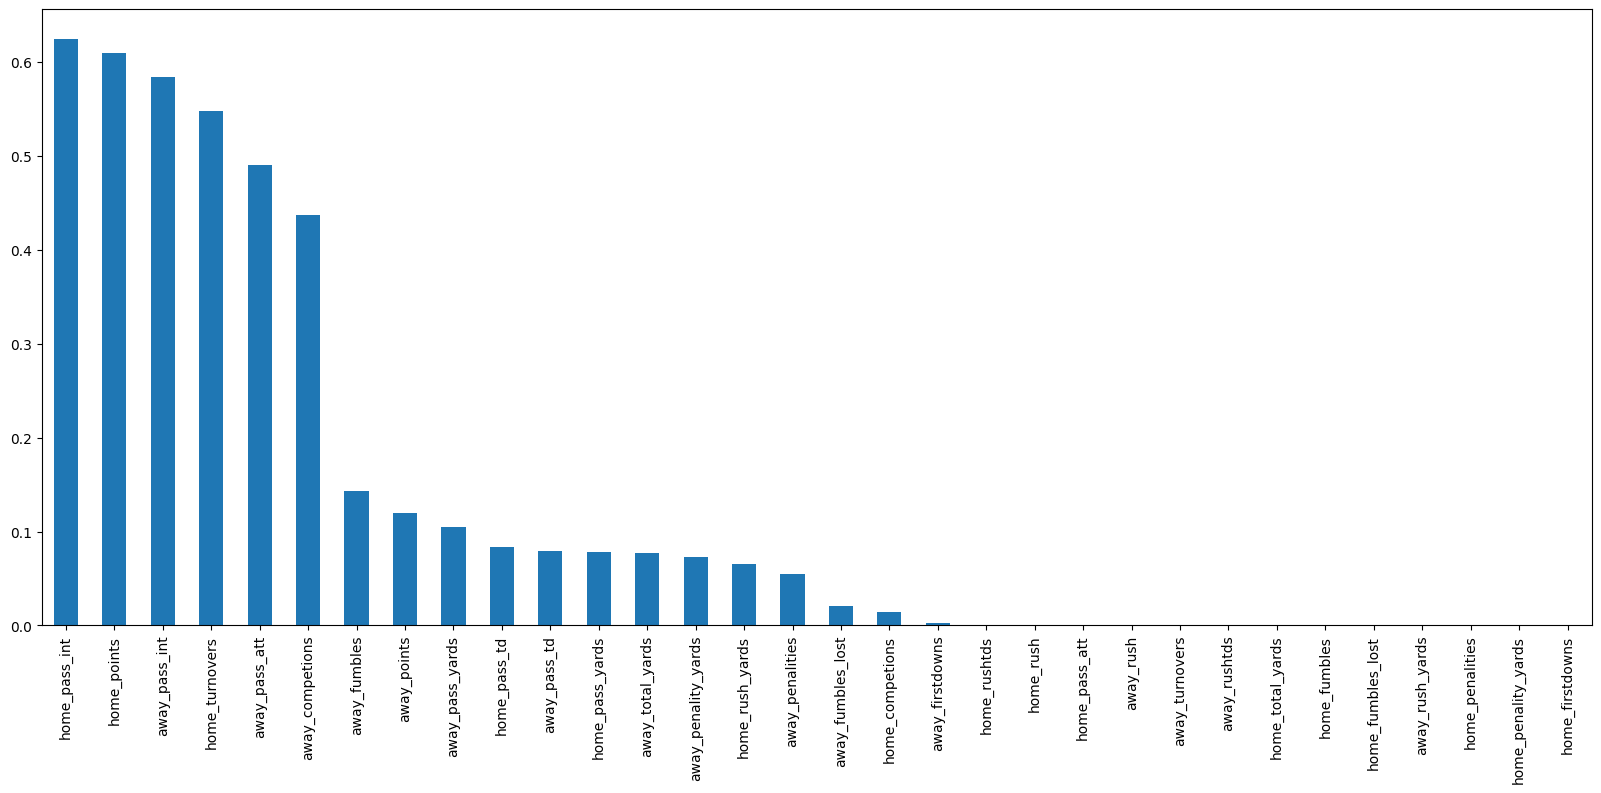

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')


# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df.iloc[:30, 3:19], df.iloc[:30, 20:-1]], axis=1)
yhome_win = df.iloc[:30, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [139]:
from sklearn.feature_selection import SelectKBest
sel_six_cols = SelectKBest(mutual_info_classif, k=6)
sel_six_cols.fit(X_train, y_train)
X_train.columns[sel_six_cols.get_support()]

Index(['away_competions', 'away_pass_att', 'away_pass_int', 'home_pass_int',
       'home_turnovers', 'home_points'],
      dtype='object')

In [140]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

home_pass_int          0.624970
home_points            0.609433
away_pass_int          0.583933
home_turnovers         0.547654
away_pass_att          0.490381
away_competions        0.437405
away_fumbles           0.143386
away_points            0.119845
away_pass_yards        0.104668
home_pass_td           0.083768
away_pass_td           0.079400
home_pass_yards        0.078457
away_total_yards       0.076886
away_penality_yards    0.072385
home_rush_yards        0.065563
away_penalities        0.054594
away_fumbles_lost      0.020178
home_competions        0.013869
away_firstdowns        0.002484
home_rushtds           0.000000
home_rush              0.000000
home_pass_att          0.000000
away_rush              0.000000
away_turnovers         0.000000
away_rushtds           0.000000
home_total_yards       0.000000
home_fumbles           0.000000
home_fumbles_lost      0.000000
away_rush_yards        0.000000
home_penalities        0.000000
home_penality_yards    0.000000
home_fir

Calculating with the best features

1. SGDClassifier() + RandomizedSearchCV best features

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df['away_competions'], df['away_pass_att'], df['away_pass_int'], df['home_pass_int'], df['home_turnovers'], df['home_points']], axis=1)
Xcombined = Xcombined.iloc[:30, :]
yhome_win = df.iloc[:30, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for random search
param_dist = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-5, 1, 7),
    'max_iter': np.arange(100, 1000, 100),
    'random_state': [SEED]
}

# Create the SGDClassifier model
sgd_clf = SGDClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(sgd_clf, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
sgd_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, sgd_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'random_state': 1, 'penalty': 'l2', 'max_iter': 200, 'loss': 'perceptron', 'alpha': 1.0}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Mean sgd_score 0.8333333333333334
accuracy_score of SGDClassifier() without searching huperparameters 0.8333333333333334


2. SGDClassifier() + GridSearchCV best features

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df['away_competions'], df['away_pass_att'], df['away_pass_int'], df['home_pass_int'], df['home_turnovers'], df['home_points']], axis=1)
Xcombined = Xcombined.iloc[:30, :]
yhome_win = df.iloc[:30, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-5, 1, 7),
    'max_iter': np.arange(100, 1000, 100),
    'random_state': [SEED]
}

# Create the SGDClassifier model
sgd_clf = SGDClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(sgd_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=skf, n_jobs=-1)
sgd_clf.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, sgd_clf.predict(X_test_scaled)))

Best Hyperparameters:
{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l2', 'random_state': 1}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Mean sgd_score 0.75
accuracy_score of SGDClassifier() without searching huperparameters 0.8333333333333334


3. LogisticRegression, RandomizedSearchCV best features

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_excel('xlsx_all_data.xlsx', index_col=0)
Xcombined = pd.concat([df['away_competions'], df['away_pass_att'], df['away_pass_int'], df['home_pass_int'], df['home_turnovers'], df['home_points']], axis=1)
Xcombined = Xcombined.iloc[:30, :]
yhome_win = df.iloc[:30, -1:]

SEED = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xcombined, yhome_win.values.ravel(), test_size=0.2, random_state=SEED)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for randomized search
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'random_state': [SEED],
}

# Create the LogisticRegression model
logreg = LogisticRegression(random_state=17)

# Perform RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=50, cv=5, random_state=SEED)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the results
print("Best Hyperparameters:")
print(best_params)

print("Accuracy on the test set:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# strategy without searching huperparameters, only cross validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
sgd_score = cross_val_score(logreg, X_train_scaled, y_train, cv=skf, n_jobs=-1)
logreg.fit(X_train_scaled, y_train)
print("Mean sgd_score", np.mean(sgd_score))
print("accuracy_score of SGDClassifier() without searching huperparameters", accuracy_score(y_test, logreg.predict(X_test_scaled)))

Best Hyperparameters:
{'solver': 'saga', 'random_state': 1, 'penalty': 'l2', 'C': 206.913808111479}
Accuracy on the test set: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

Mean sgd_score 0.7916666666666666
accuracy_score of SGDClassifier() without searching huperparameters 0.8333333333333334
